## Lab 2 -Pitfalls of retrieval - when simple vector search fails! 

In [1]:
from helper_utils import load_chroma, word_wrap
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()

chroma_collection = load_chroma(filename='microsoft_annual_report_2022.pdf', collection_name='microsoft_annual_report_2022', embedding_function=embedding_function)
chroma_collection.count()

444

In [2]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/home/mark/anaconda3/envs/OpenAI/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [3]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings   

In [4]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|█████████████████████████████████████████| 444/444 [04:22<00:00,  1.69it/s]


(0.974271410703659, 10.549678093194961, 3.548027181625366, 10.952874040603637)

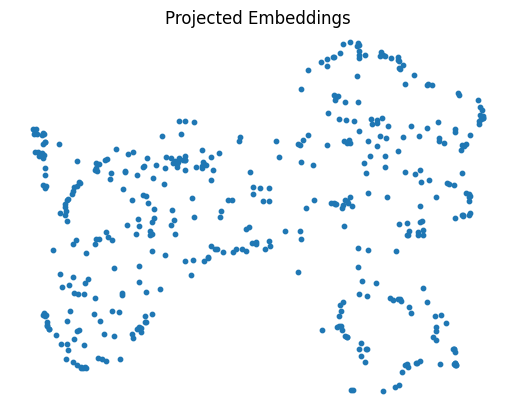

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

## Relevancy and Distraction

In [6]:
query = "What is the total revenue?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

include legal, including settlements and ﬁnes, information technology,
human resources, ﬁnance, excise taxes, ﬁeld selling, shared facilities
services, and customer service and support. each allocation is measured
differently based on the specific facts and circumstances of the costs
being allocated. segment revenue and operating income were as follows
during the periods presented : ( in millions ) year ended june 30, 2022
2021 2020 revenue productivity and business processes $ 63, 364 $ 53,
915 $ 46, 398 intelligent cloud 75, 251 60, 080 48, 366 more personal
computing 59, 655 54, 093 48, 251 total $ 198, 270 $ 168, 088 $ 143,
015 operating income

services. unearned revenue is generally invoiced annually at the
beginning of each contract period for multi - year agreements and
recognized ratably over the coverage period. unearned revenue also
includes payments for other [UNK] for which we have been paid in
advance and earn the revenue when we transfer control of the product or
service

In [7]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.68it/s]


(0.974271410703659, 10.549678093194961, 3.548027181625366, 10.952874040603637)

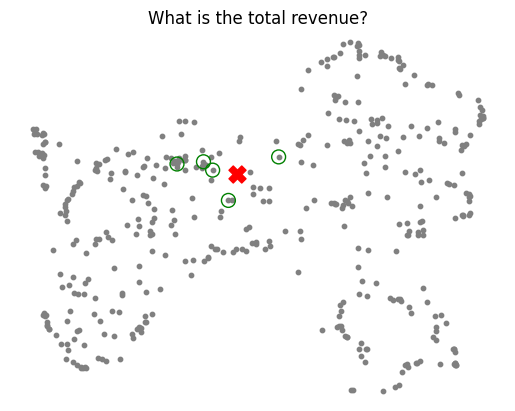

In [8]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [9]:
query = "What is the strategy around artificial intelligence (AI) ?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

business. ai algorithms may be ﬂawed. datasets may be [UNK] or contain
biased information. [UNK] or inadequate ai development or deployment
practices by microsoft or others could result in incidents that impair
the acceptance of ai solutions or cause harm to individuals or society.
these deﬁciencies and other failures of ai systems could subject us to
competitive harm, regulatory action, legal liability, including under
new proposed legislation regulating ai in jurisdictions such as the
european union ( “ eu ” ), and brand or reputational harm. some ai
scenarios present ethical issues. if we enable or [UNK] ai solutions
that are controversial because of their impact on human rights,
privacy, employment, or other social, economic, or political issues, we
may experience brand or reputational harm. operational risks we may
have excessive outages, data losses, and disruptions of our online
services if we fail to maintain an adequate operations infrastructure.

faces today. organizations of

In [10]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]


(0.974271410703659, 10.549678093194961, 3.548027181625366, 10.952874040603637)

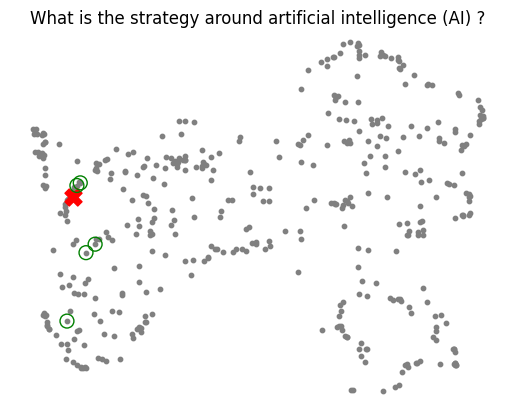

In [11]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [12]:
query = "What has been the investment in research and development?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

part ii item 7 operating expenses research and development ( in
millions, except percentages ) 2022 2021 percentage change research and
development $ 24, 512 $ 20, 716 18 % as a percent of revenue 12 % 12 %
0ppt research and development expenses include payroll, employee
beneﬁts, stock - based compensation expense, and other headcount -
related expenses associated with product development. research and
development expenses also include third - party development and
programming costs, localization costs incurred to translate software
for international markets, and the amortization of purchased software
code and services content. research and development expenses increased
$ 3. 8 billion or 18 % driven by investments in cloud engineering,
gaming, and linkedin. sales and marketing ( in millions, except
percentages ) 2022 2021 percentage change

technology trends, to enter new geographic and product markets, and to
drive broad adoption of our products and services. we invest in a range
of 

In [13]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.84it/s]


(0.974271410703659, 10.549678093194961, 3.548027181625366, 10.952874040603637)

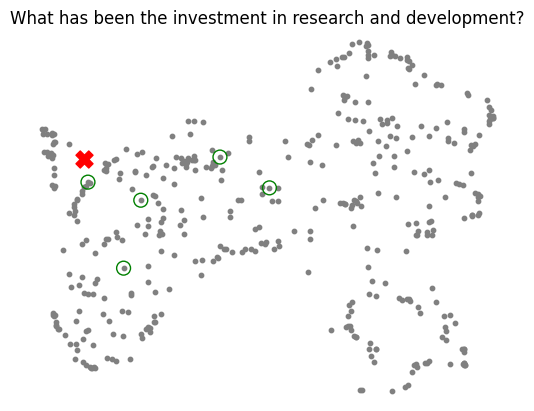

In [14]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [15]:
query = "What has Michael Jordan done for us lately?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

services. the metrics are disclosed in the md & a or the notes to
financial statements ( part ii, item 8 of this form 10 - k ). financial
metrics are calculated based on ﬁnancial results prepared in accordance
with accounting principles generally accepted in the united states of
america ( “ gaap ” ), and growth comparisons relate to the
corresponding period of last fiscal year. in the ﬁrst quarter of ﬁscal
year 2022, we made updates to the presentation and method of
calculation for certain metrics, most notably changes to incorporate
all current and anticipated revenue streams within our [UNK] consumer
and server products and cloud services metrics and changes to align
with how we manage our windows oem and search and news advertising
businesses. none of these changes had a material impact on previously
reported amounts in our md & a.

we report our ﬁnancial performance based on the following segments :
productivity and business processes, intelligent cloud, and more
personal computing

In [16]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]


(0.974271410703659, 10.549678093194961, 3.548027181625366, 10.952874040603637)

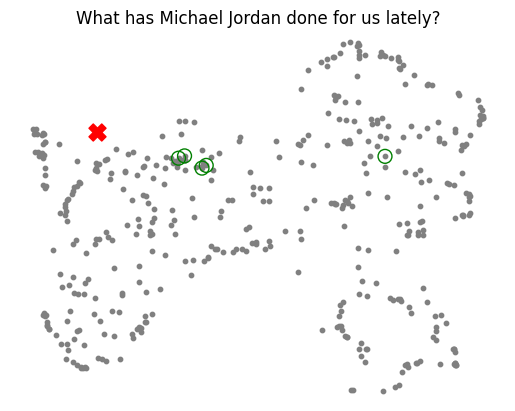

In [17]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')